In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from hw5.mdp import MDP, StochasticMDP
from hw5.algo import dyna_q, dyna_q_prioritized_sweeping, q_planning

### Take the lion and cow domain from the last homework (on a 10x10 grid) with 2 cows.

In [2]:
random.seed(42)
MAXITER = 10000
mdp2 = MDP(cow_positions=[(9, 9), (0, 9)])

### 1. Apply Dyna-Q and Dyna-Q+ with prioritized sweeping to this domain, and compare the learning speed to Q learning. 

In [3]:
policy, iterations, cumreward, _ = \
    dyna_q(mdp2, alpha=0.8, gamma=0.8, n=5, maxiter=MAXITER, eps=0.8)
dyna_q_dict = {"iterations": iterations, "cumreward": cumreward}

policy, iterations, cumreward = q_planning(mdp2, alpha=0.8, gamma=0.8, maxiter=MAXITER)
q_planning_dict = {"iterations": iterations, "cumreward": cumreward}

policy, iterations, cumreward = \
    dyna_q_prioritized_sweeping(mdp2, alpha=0.8, gamma=0.8, n=5, eps=0.8, theta=1, maxiter=MAXITER)
dyna_q_plus_dict = {"iterations": iterations, "cumreward": cumreward}

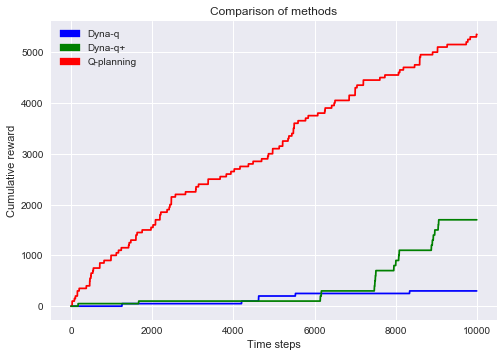

In [4]:
sns.set_style("darkgrid")
plt.plot(dyna_q_dict["iterations"], dyna_q_dict["cumreward"], 'b',
         q_planning_dict["iterations"], q_planning_dict["cumreward"], 'r',
         dyna_q_plus_dict["iterations"], dyna_q_plus_dict["cumreward"], 'g')

red_patch = mpatches.Patch(color='b', label='Dyna-q')
green_patch = mpatches.Patch(color='g', label='Dyna-q+')
blue_patch = mpatches.Patch(color='r', label='Q-planning')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.xlabel('Time steps')
plt.ylabel('Cumulative reward')
plt.title('Comparison of methods')
plt.show()

### 2. Make the domain stochastic in the following way: each movement action has 70% chance of success. With 30% probability, the lion will move in the opposite direction. Repeat the above exercise on this domain. 


In [5]:
mdp2 = StochasticMDP(cow_positions=[(9, 9), (0, 9)])

In [6]:
policy, iterations, cumreward, _ = \
    dyna_q(mdp2, alpha=0.8, gamma=0.8, n=5, maxiter=MAXITER, eps=0.8)
dyna_q_dict = {"iterations": iterations, "cumreward": cumreward}

policy, iterations, cumreward = q_planning(mdp2, alpha=0.8, gamma=0.8, maxiter=MAXITER)
q_planning_dict = {"iterations": iterations, "cumreward": cumreward}

policy, iterations, cumreward = \
    dyna_q_prioritized_sweeping(mdp2, alpha=0.8, gamma=0.8, n=5, eps=0.8, theta=1, maxiter=MAXITER)
dyna_q_plus_dict = {"iterations": iterations, "cumreward": cumreward}

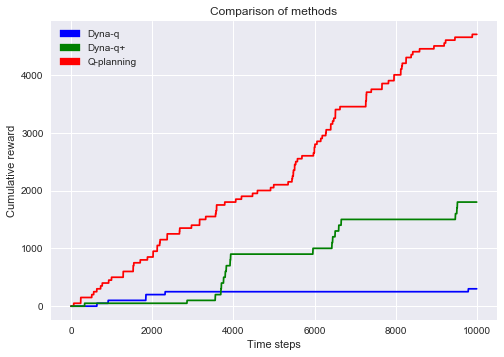

In [7]:
sns.set_style("darkgrid")
plt.plot(dyna_q_dict["iterations"], dyna_q_dict["cumreward"], 'b',
         q_planning_dict["iterations"], q_planning_dict["cumreward"], 'r',
         dyna_q_plus_dict["iterations"], dyna_q_plus_dict["cumreward"], 'g')

red_patch = mpatches.Patch(color='b', label='Dyna-q')
green_patch = mpatches.Patch(color='g', label='Dyna-q+')
blue_patch = mpatches.Patch(color='r', label='Q-planning')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.xlabel('Time steps')
plt.ylabel('Cumulative reward')
plt.title('Comparison of methods')
plt.show()